In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


### <font color='blue'>1. Data understanding, preparation and EDA</font>

In [111]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [112]:
print('Shape: ', df.shape)
print('\nInfo: ')
df.info()
print('\nDescribe: ')
df.describe()

Shape:  (730, 16)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB

Describe: 


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### <font color='blue'>Observations:</font>
- Dataset has 16 Columns and 730 Rows
- Dataset doesnot have any null values
- Except for dteday which is data, all other columns are numeric
- Can drop 
    - instant: as its just the id 
    - dteday: as we already have yr and month 
    - casual & registered: as the sum is in cnt, which is the target variable
    - temp: as we have atemp, which is more suggestive than actual temp
- Map numerical values in categorical variables
    - season
    - mnth
    - weekday
    - weathersit
- Need to create dummy variables for categorical variables
    - season
    - mnth
    - weekday
    - weathersit
- Categorical Variables, which doesnot need change
    - yr: being 2018 or 2019, which is already correctly represented with a dummy as 0 or 1

In [113]:
#Can drop 
#    - instant: as its just the id 
#    - dteday: as we already have yr and month 
#    - casual & registered: as the sum is in cnt, which is the target variable
#    - temp: as we have atemp, which is more suggestive than actual temp
df = df.drop(['instant', 'dteday', 'casual', 'registered', 'temp'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [114]:
##Map numerical values in categorical variables
#    - mnth
#    - weekday
#    - weathersit
df['season'] = df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
df['mnth']= df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df['weekday'] = df['weekday'].map({0:'Tue', 1:'Wed', 2:'Thu', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon'})
df['weathersit'] = df['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Precepitation', 4:'Heavy Precipitation'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,Mist,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,0,Mist,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,11.46350,43.6957,12.522300,1600


In [115]:
continous_columns = ['atemp', 'hum', 'windspeed', 'cnt']
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

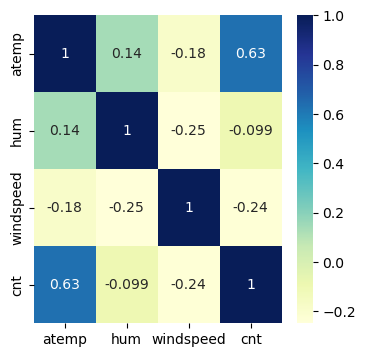

In [116]:
# generate heatmap to see the correlation 
# and see if any more columns can be dropped
plt.figure(figsize=(4,4))
sns.heatmap(df[continous_columns].corr(), annot=True, cmap='YlGnBu')
plt.show()

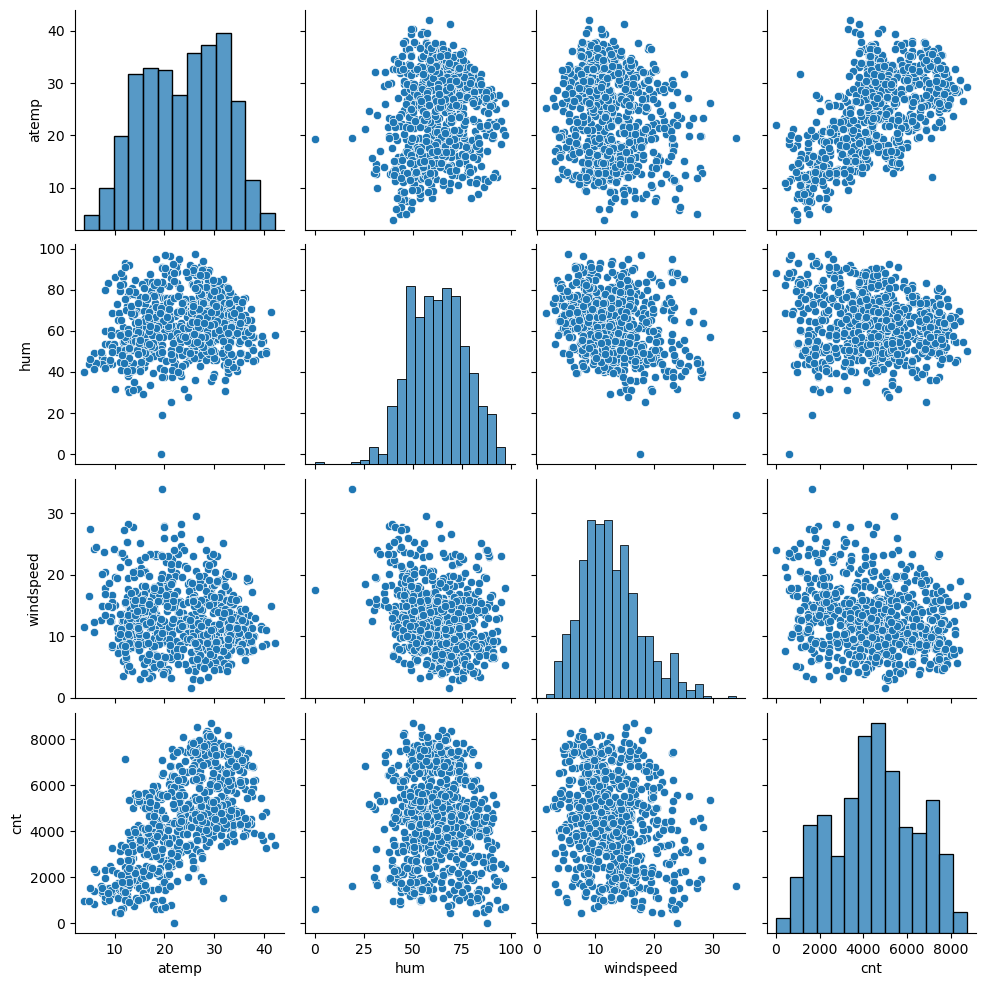

In [117]:
sns.pairplot(df, x_vars=continous_columns, y_vars=continous_columns)
plt.show()

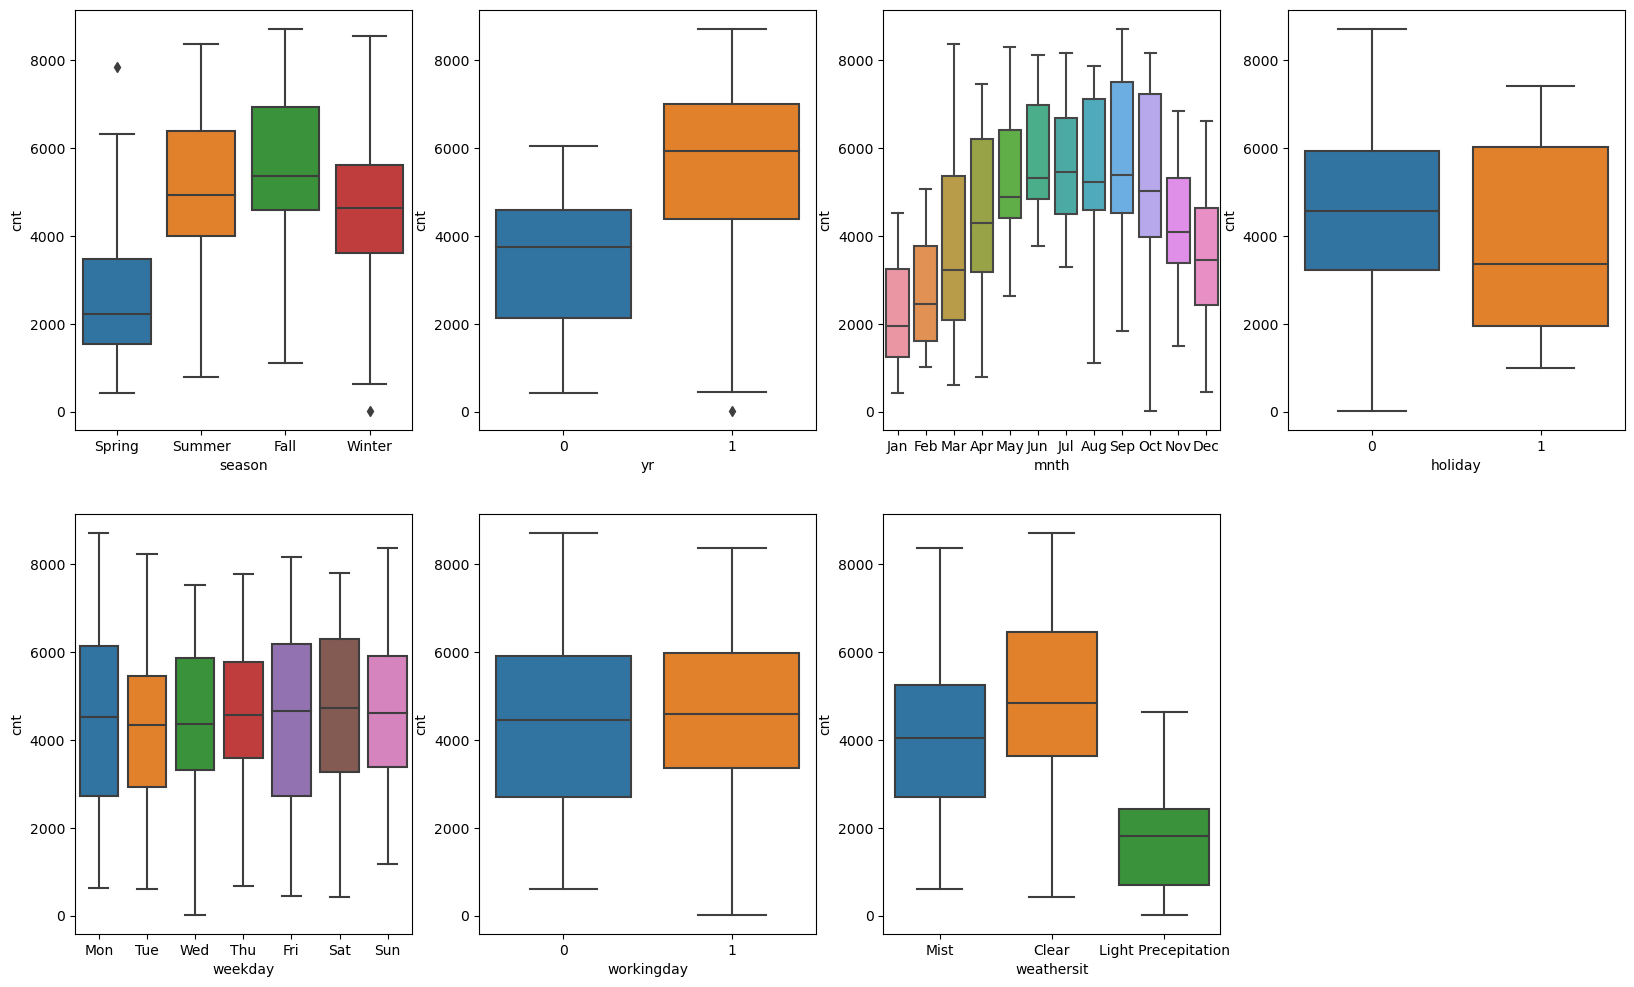

In [118]:
plt.figure(figsize=(20,12))
for i,c in enumerate(categorical_columns):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=c, y='cnt', data=df)

plt.show()

##### Obeservation:
dont have to drop any more variables as the correlation is not much near to cnt

In [119]:
#Need to create dummy variables for categorical variables
#    - season
#    - mnth
#    - weekday
#    - weathersit
def create_dummies(data, col_name):
    ds = pd.get_dummies(data[col_name], drop_first=True, dtype=int)
    data = pd.concat([data, ds], axis=1)
    data = data.drop(col_name, axis=1)
    return data

df = create_dummies(df, 'season')
df = create_dummies(df, 'mnth')
df = create_dummies(df, 'weekday')
df = create_dummies(df, 'weathersit')
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Precepitation,Mist
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
continous_columns_notarget = continous_columns[:]
continous_columns_notarget.remove('cnt')
continous_columns_notarget

['atemp', 'hum', 'windspeed']

In [123]:
# create train-test split with 70:30
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [125]:
# check some values before applying MinMaxScaler
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Precepitation,Mist
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,16.0977,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [126]:
# scale continous columns
scaler = MinMaxScaler()
df_train[continous_columns] = scaler.fit_transform(df_train[continous_columns])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Precepitation,Mist
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1
